<a href="https://colab.research.google.com/github/Haldeit/HW5-Kaggle-code-C-S-E-4-1-6/blob/main/Copy_of_HW6_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This cell is necessary only if you are running on Google Colab. It downloads the files to your
# Colab instance so you don't have to upload them here.

import requests

def save_file(url, file_name):
    r = requests.get(url)
    with open(file_name, 'wb') as f:
      f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse416/21sp/homework/hw6/edx_train.csv', 
          'edx_train.csv')
save_file('https://courses.cs.washington.edu/courses/cse416/21sp/homework/hw6/edx_test.csv', 
          'edx_test.csv')

#Kaggle name: PeteZ 
#Team: myself

First let's import whatever that's helpful!

In [2]:
import math
import string

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer

Now let's read the files and take a peek at them.

In [3]:
train = pd.read_csv('edx_train.csv')
test = pd.read_csv('edx_test.csv')

train = train.fillna(0)
test = test.fillna(0)
train.head()
#test.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts
0,HarvardX/CS50x/2012,MHxPC130545492,1,1,1,1,United States,Master's,1984.0,m,1,3/10/13,7/29/13,1161.0,50.0,0.0,12.0,0
1,HarvardX/ER22x/2013_Spring,MHxPC130536944,1,1,1,1,United Kingdom,Master's,1985.0,f,0.85,3/13/13,8/1/13,1360.0,10.0,0.0,29.0,0
2,HarvardX/CS50x/2012,MHxPC130442298,1,1,1,1,India,0,0.0,0,1,8/2/12,7/25/13,77.0,18.0,0.0,7.0,0
3,HarvardX/ER22x/2013_Spring,MHxPC130273564,1,1,1,1,United Kingdom,Bachelor's,1982.0,m,0.85,1/23/13,8/13/13,1425.0,29.0,0.0,34.0,0
4,HarvardX/CS50x/2012,MHxPC130247761,1,1,0,0,United States,Secondary,1989.0,m,0,3/5/13,3/5/13,6.0,1.0,0.0,1.0,0


#**Identifying target and feature choosing**

## Looks like the column "certified" is our target.

## It seems like everyone has "registered" the courses listed, otherwise they wouldn't even appear on this form! 

## Views, explores, grade, and all the Ns are definitely important features, it shows at least how interested students are in the course and their devotion. One more label I am interested is the length of the course, we could compute this by subtracting start date from end date.

#*Creating the new date column for both train and test, named "length"*





In [4]:
train[['start_time_DI','last_event_DI']] = train[['start_time_DI','last_event_DI']].apply(pd.to_datetime)
train['length'] = (train['last_event_DI'] - train['start_time_DI']).dt.days

test[['start_time_DI','last_event_DI']] = test[['start_time_DI','last_event_DI']].apply(pd.to_datetime)
test['length'] = (test['last_event_DI'] - test['start_time_DI']).dt.days

train.head()
#test.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,length
0,HarvardX/CS50x/2012,MHxPC130545492,1,1,1,1,United States,Master's,1984.0,m,1,2013-03-10,2013-07-29,1161.0,50.0,0.0,12.0,0,141
1,HarvardX/ER22x/2013_Spring,MHxPC130536944,1,1,1,1,United Kingdom,Master's,1985.0,f,0.85,2013-03-13,2013-08-01,1360.0,10.0,0.0,29.0,0,141
2,HarvardX/CS50x/2012,MHxPC130442298,1,1,1,1,India,0,0.0,0,1,2012-08-02,2013-07-25,77.0,18.0,0.0,7.0,0,357
3,HarvardX/ER22x/2013_Spring,MHxPC130273564,1,1,1,1,United Kingdom,Bachelor's,1982.0,m,0.85,2013-01-23,2013-08-13,1425.0,29.0,0.0,34.0,0,202
4,HarvardX/CS50x/2012,MHxPC130247761,1,1,0,0,United States,Secondary,1989.0,m,0,2013-03-05,2013-03-05,6.0,1.0,0.0,1.0,0,0


#**Now, we select first set of features and give it a train!**

In [5]:
features_1 = ['viewed', 'explored', 'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts', 'length']

model_1 = LogisticRegression(penalty='l2', random_state=1, C=1)
model_1.fit(train[features_1], train['certified'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now compute the train error for our model_1

In [6]:
train_pred_1 = model_1.predict(train[features_1])
train_acc_1 = accuracy_score(train['certified'], train_pred_1)

print("Train: ", train_acc_1)

Train:  0.9462205983101165


As we can see we did okay. However, this is just the training set. Maybe we should add validation set as well! Then we do the similar procedure! (train and calculate validation accuracy)

In [7]:
train, val = train_test_split(train, test_size=0.2, random_state=1)
model_2 = LogisticRegression(penalty='l2', random_state=1, C=1)
model_2.fit(train[features_1], train['certified'])

train_pred_2 = model_2.predict(train[features_1])
train_acc_2 = accuracy_score(train['certified'], train_pred_2)
val_pred_2 = model_2.predict(val[features_1])
val_acc_2 = accuracy_score(val['certified'], val_pred_2)

print("Train: ", train_acc_2)
print("Validation: ", val_acc_2)



Train:  0.94376248929489
Validation:  0.954337899543379


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#Let's use decision tree classifier instead!

In [8]:
model_3 = DecisionTreeClassifier(max_depth=5,random_state=1, min_samples_leaf=20)
model_3.fit(train[features_1], train['certified'])

train_pred_3 = model_3.predict(train[features_1])
train_acc_3 = accuracy_score(train['certified'], train_pred_3)
val_pred_3 = model_3.predict(val[features_1])
val_acc_3 = accuracy_score(val['certified'], val_pred_3)

print("Train: ", train_acc_3)
print("Validation: ", val_acc_3)

Train:  0.9674564658863831
Validation:  0.9765981735159818


# Looks like we are doing better! What if we try different max depth?
now we use 5-fold since we splitted the train and validation by 80 20 before.

In [9]:
from sklearn.model_selection import GridSearchCV
# this is very similar to HW4
hyperparameters = {'min_samples_leaf': [1, 10, 50, 100, 200, 300], 'max_depth': [1, 5, 10, 15, 20]}

search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=hyperparameters, cv=5, return_train_score=True)
search.fit(train[features_1], train['certified'])
print(search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 10}


#Now let's do everything again with the optimized parameters!

In [10]:
model_final = DecisionTreeClassifier(max_depth=5,random_state=1, min_samples_leaf=10)
model_final.fit(train[features_1], train['certified'])

train_pred_final = model_final.predict(train[features_1])
train_acc_final = accuracy_score(train['certified'], train_pred_final)
val_pred_final = model_final.predict(val[features_1])
val_acc_final = accuracy_score(val['certified'], val_pred_final)
test_pred_final = model_final.predict(test[features_1])

print("Train: ", train_acc_3)
print("Validation: ", val_acc_3)

Train:  0.9674564658863831
Validation:  0.9765981735159818


# A graph to visualize the improvement

<BarContainer object of 7 artists>

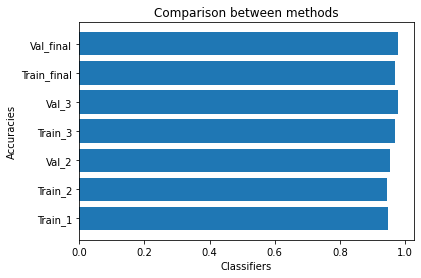

In [20]:
plt.title('Comparison between methods')
plt.xlabel('Classifiers')
plt.ylabel('Accuracies')
x_values = ['Train_1', 'Train_2', 'Val_2', 'Train_3', 'Val_3', 'Train_final', 'Val_final']
y_values = [train_acc_1, train_acc_2, val_acc_2, train_acc_3, val_acc_3, train_acc_final, val_acc_final]
plt.barh(x_values, y_values)

This plot shows the trend of accuracies improving from around 0.94 to 0.97 in the end. The first model used regular logistic regression; the second model used the same with validation set with size of 0.2; the third model used decision tree with a fixed max depth; the final model used the most optimal depth and the number of minimum sample leaves, in this way we are able to achieve a higher accuracy! Other features that I didn't put in don't seem to make a difference as they get very ethical and could lead to extreme bias and inaccuracy.

# Finally let's print the result!

In [11]:
to_save = test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = test_pred_final
to_save.to_csv('submission.csv', index=False)